In [8]:
import pandas as pd
import numpy as np
import os
import gensim
import nltk

In [9]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Venky\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Venky\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Venky\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Venky\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Venky\AppData\Roaming\nltk_data...
[

True

In [10]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

lets understand word tokenize and sentence tokenize with examples

In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize


data = "Hello, John! How are you doing today? I hope all is well"
#Word_tokenize will yield words from given corpus
print(word_tokenize(data)) 

# Sentence_tokenize will yield sentence from given corpus
print(sent_tokenize(data))

['Hello', ',', 'John', '!', 'How', 'are', 'you', 'doing', 'today', '?', 'I', 'hope', 'all', 'is', 'well']
['Hello, John!', 'How are you doing today?', 'I hope all is well']


In [12]:
raw_data = sent_tokenize(data)
for k in raw_data:
    print(simple_preprocess(k)) #Simple_preprocess converts documents into a list of tokens ie. removes all punctuation and divides into words

['hello', 'john']
['how', 'are', 'you', 'doing', 'today']
['hope', 'all', 'is', 'well']


In [13]:
os.listdir("../Books")

['001ssb.txt', '002ssb.txt', '003ssb.txt', '004ssb.txt']

In [14]:
for file in os.listdir("../Books"):
    print(file)

001ssb.txt
002ssb.txt
003ssb.txt
004ssb.txt


In [15]:
tokens =[]
for file in os.listdir("../Books"):
    file_path = os.path.join("../Books",file)

    with open(file_path,encoding='unicode_escape') as f:
        text = f.read()
        f.close()
        #print(text[:100])
        raw = nltk.tokenize.sent_tokenize(text=text)
        for k in raw:
            tokens.append(simple_preprocess(k))

In [16]:
len(tokens)

115483

In [17]:
type(tokens)

list

In [18]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300')


# Key Components
## gensim.models.Word2Vec:
    * This is the class used to create a Word2Vec model in Gensim.
    * Word2Vec is a technique to generate dense vector representations (embeddings) of words in a way that captures semantic relationships between them.
### Parameters
#### window=10:
#### Definition: 
        The maximum distance between the current word and the context words considered during training.
#### Effect: 
        A window size of 10 means the model will look at up to 10 words to the left and right of the current word to predict its neighbors (context).
#### Interpretation: 
        Larger windows capture more global context, while smaller windows capture more local context.
#### min_count=5:
    Definition: The minimum number of occurrences a word must have in the corpus to be included in the vocabulary.
    Effect: Words that appear less than 5 times are ignored by the model.
    Reason: This helps reduce noise by excluding rare words that may not contribute meaningful information.
#### vector_size=150:
    Definition: The size (or dimensionality) of the word vectors to be generated.
    Effect: Each word will be represented as a vector with 150 dimensions.
    Trade-off:
        Higher dimensions can capture more nuanced relationships but may require more computational resources and risk overfitting for small datasets.
    Lower dimensions are faster but might lose some representational power.
#### Default Parameters (Optional)
    If not explicitly specified, the following default parameters will also be used:

#### sg=0: 
    The model uses the CBOW (Continuous Bag of Words) architecture. If set to 1, it uses Skip-Gram instead.
#### epochs=5: 
    The model will train for 5 iterations over the entire dataset.
#### workers=3: 
    Specifies the number of CPU threads used for training.


In [27]:

# The command initializes a Word2Vec model with the following characteristics:

# It focuses on the context within a window size of 10 words.
# It ignores rare words appearing fewer than 5 times in the corpus.
# It produces 150-dimensional embeddings for words in the vocabulary.


# Create and train the model
gensim_word2vec_model = gensim.models.Word2Vec(window=10, min_count=5, vector_size=150)

# Train the model using the tokens list, specifying the total number of sentences and epochs
gensim_word2vec_model.build_vocab(tokens)  # Build the vocabulary
gensim_word2vec_model.train(tokens, total_examples=len(tokens), epochs=5)

# save the model for later use
gensim_word2vec_model.save("word2vec_model.model")

# To access word vectors
vector = gensim_word2vec_model.wv['sentence']  # Get vector for a specific word

In [30]:
len(vector) #we had given vector size as 150 while building model so its created with 150 dimensions

150

In [40]:
print(gensim_word2vec_model.epochs)
print(gensim_word2vec_model.min_count)
print(gensim_word2vec_model.sample)
print(gensim_word2vec_model.corpus_count)


5
5
0.001
115483


In [43]:
gensim_word2vec_model.wv['king'].shape

(150,)

In [45]:
gensim_word2vec_model.wv.most_similar('king')

[('throne', 0.6890163421630859),
 ('realm', 0.6856116652488708),
 ('tourney', 0.6514337658882141),
 ('prince', 0.6505308151245117),
 ('baratheon', 0.6379901766777039),
 ('council', 0.6289103031158447),
 ('victory', 0.6112743020057678),
 ('stannis', 0.608135998249054),
 ('usurper', 0.6060800552368164),
 ('claim', 0.5914953351020813)]

# Apply PCA to reduce vectors to 2D or 3D

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Extracting word vectors (embeddings) from the trained Word2Vec model
word_vectors = gensim_word2vec_model.wv.vectors
print('len - (vocab size)',len(word_vectors)) #here output is 10176 so it means we have 10176 unique words in vocabulary
print('vector len first word ',len(word_vectors[0])) #here output is 150 so it means each word is represented with 150 dimensional vector.


pca_2d = PCA(n_components=2)
two_dimension_vectors = pca_2d.fit_transform(word_vectors)


pca_3d = PCA(n_components=3)
three_dimension_vectors = pca_3d.fit_transform(word_vectors)

print('Original Shape ',word_vectors.shape)

print('shape of 2d using PCA ',two_dimension_vectors.shape)


print('shape of 3d using PCA ',three_dimension_vectors.shape)

len - (vocab size) 10176
vector len first word  150
Original Shape  (10176, 150)
shape of 2d using PCA  (10176, 2)
shape of 3d using PCA  (10176, 3)


In [81]:
three_dimension_vectors[:,0]

# The colon (:) before the comma means select all rows.
# The 0 after the comma means select the first column.

array([ 1.9582059 ,  2.1839745 , -2.97845   , ..., -0.2416316 ,
       -0.3365304 , -0.07535499], dtype=float32)

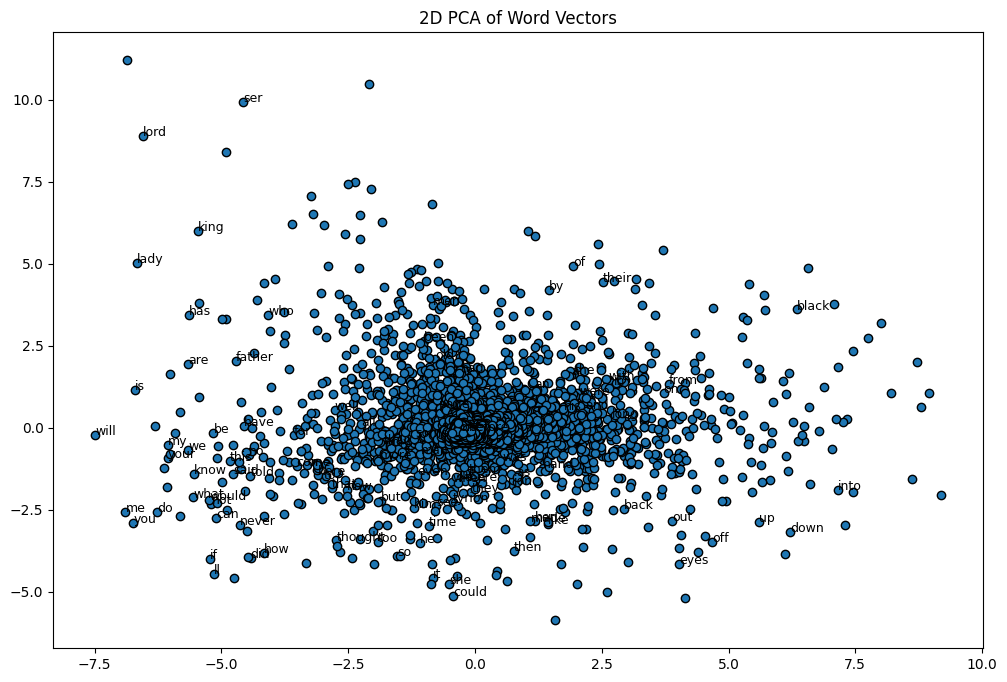

In [93]:
plt.figure(figsize=(12,8))

# two_dimension_vectors[:, 0] provides the x-values (first dimension).
# two_dimension_vectors[:, 1] provides the y-values (second dimension).

plt.scatter(two_dimension_vectors[:,0],two_dimension_vectors[:,1],edgecolors='k', marker='o')

words = list(gensim_word2vec_model.wv.key_to_index)  # List of words in the vocabulary
for i,w in enumerate(words[:100]):
    plt.annotate(w,(two_dimension_vectors[i,0],two_dimension_vectors[i,1]),fontsize=9)
#The relative positions of words in the plot are important. Words that are close to each other in the plot 
# are likely to have similar meanings or appear in similar contexts in your training data.
plt.title("2D PCA of Word Vectors")
plt.show()

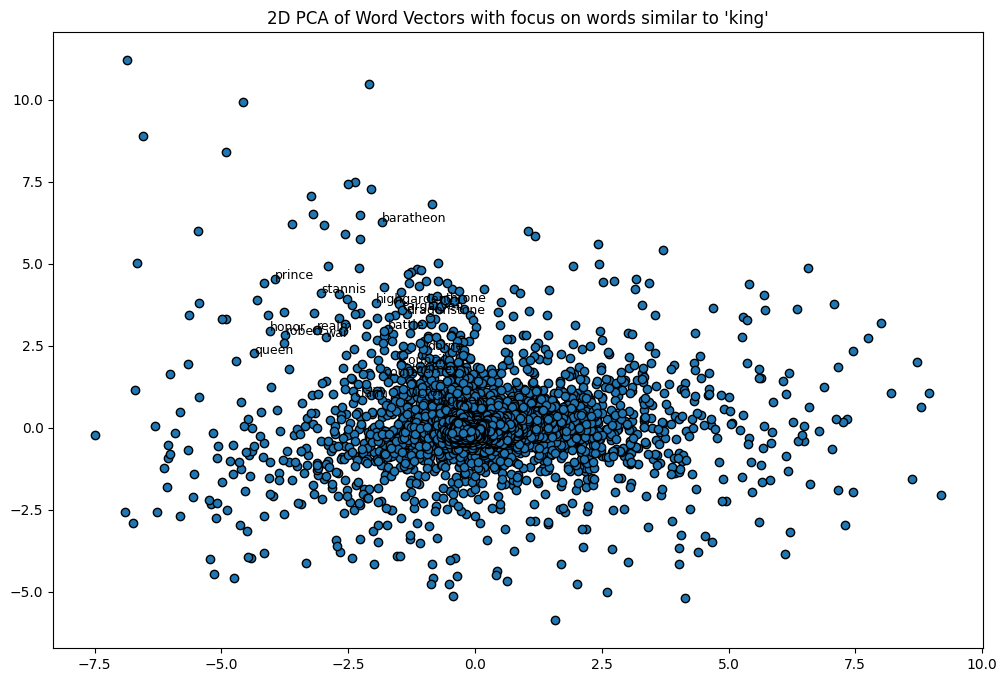

In [100]:
word="king"

similar_words = gensim_word2vec_model.wv.most_similar(word,topn=20)


# Find corresponding indices in the reduced_vectors
indices = [words.index(similar_word[0]) for similar_word in similar_words]

# Plot the most similar words to King
plt.figure(figsize=(12,8))
plt.scatter(two_dimension_vectors[:,0],two_dimension_vectors[:,1],edgecolors='k',marker='o')

# Annotate only for the selected words
for i in indices:
    plt.annotate(words[i],(two_dimension_vectors[i,0],two_dimension_vectors[i,1]),fontsize=9)

plt.title(f"2D PCA of Word Vectors with focus on words similar to '{word}'")
plt.show()

## Before PCA:
    most_similar('lord') gets the words that are most similar to 'lord' in the original high-dimensional space. 
    This uses the original word embeddings.
## After PCA:
    We first reduce the word vectors to 2D using PCA.
    Then, we compute the cosine similarity between the PCA-reduced vector of 'lord' and the vectors of other words in the reduced space.
    The result is a list of words ranked by their similarity to 'lord' in the 2D PCA space.

# Key Points:

* PCA reduces dimensions while trying to preserve as much of the variance as possible, 
    but there will be a small loss of information. Hence, the similarity scores might slightly change after applying PCA.
* Cosine similarity is a good way to compare word vectors both in the original space and the PCA-reduced space.
* PCA helps to visualize and interpret word relationships in lower dimensions, but the similarity relationships between words will remain      relatively similar (but not exactly the same) after PCA.

In [153]:
from sklearn.metrics.pairwise import cosine_similarity

similar_words_before_pca = gensim_word2vec_model.wv.most_similar('lord',topn=5)
for word,score in (similar_words_before_pca):
    print(f"word {word} and score: {score:.4f}")

words = list(gensim_word2vec_model.wv.key_to_index)  # List of words in the vocabulary

# Create a mapping of words to their 2D PCA vectors
word_2_pca_vector = {words[i]: two_dimension_vectors[i] for i in range(len(words))}

print(dict(list(word_2_pca_vector.items())[0:3]))

#Get PCA Vector for 'Lord'
lord_vector_pca = word_2_pca_vector['lord']

similarities_in_pca=[]
for word,vec in word_2_pca_vector.items():
    cos_sim = cosine_similarity([lord_vector_pca],[vec])[0][0]
    similarities_in_pca.append((word,cos_sim))
similarities_in_pca_sort = sorted(similarities_in_pca,key=lambda x:x[1],reverse=True)

#print(similarities_in_pca_sort)
print("similarity words for Lord after PCA")
for word,score in similarities_in_pca_sort[:5]:
    print(f"word {word} and score {score:.4f}")

word son and score: 0.7378
word roose and score: 0.7320
word bastard and score: 0.6975
word heir and score: 0.6760
word castellan and score: 0.6483
{'the': array([1.9582059, 1.6476085], dtype=float32), 'and': array([2.1839745 , 0.56207633], dtype=float32), 'to': array([-2.97845  , -1.5618331], dtype=float32)}
similarity words for Lord after PCA
word lord and score 1.0000
word highborn and score 1.0000
word styling and score 1.0000
word raiding and score 1.0000
word feast and score 1.0000
